In [1]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pathlib import Path

# Project root 3 levels up
project_root = Path.cwd().parents[2]

In [2]:
df = pd.read_csv(project_root / 'datasets/01_regression/Salary_Data.csv')
df.head()
df.shape

(30, 2)

In [3]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20, 1), (10, 1), (20,), (10,))

In [6]:
standard_scalar = StandardScaler()
X_train = standard_scalar.fit_transform(X_train)
X_test_1 = standard_scalar.transform(X_test)

In [7]:
X_train.shape, X_test_1.shape, y_train.shape, y_test.shape

((20, 1), (10, 1), (20,), (10,))

In [8]:
linear_regression = LinearRegression()

In [9]:
linear_regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
linear_regression.predict(X_test_1)

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [11]:
X_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9]])

In [12]:
X_test_1

array([[-1.27636084],
       [ 2.20103092],
       [-0.24894964],
       [-0.32798127],
       [ 1.88490439],
       [ 1.56877787],
       [ 1.92442021],
       [-0.28846545],
       [ 0.22524015],
       [ 1.25265135]])

In [13]:
standard_scalar.inverse_transform(X_test_1)

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9]])

In [14]:
import matplotlib.pyplot as plt

In [15]:
y_pred = linear_regression.predict(X_test_1)

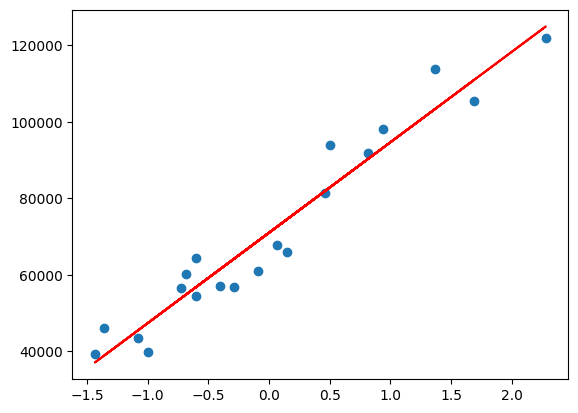

In [16]:
plt.scatter(X_train, y_train)
plt.plot(X_train, linear_regression.predict(X_train),c='r')
plt.show()

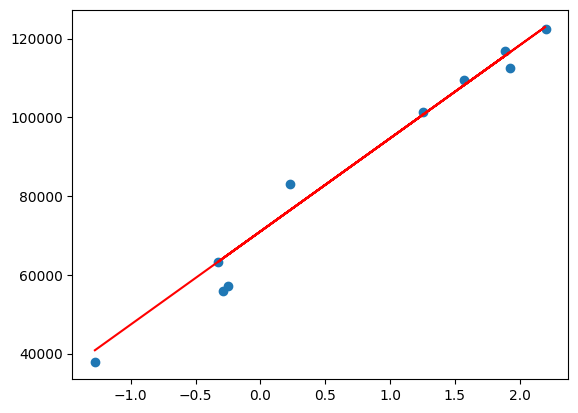

In [17]:

plt.scatter(X_test_1, y_test)
plt.plot(X_test_1, linear_regression.predict(X_test_1), c='r')
plt.show()


In [18]:
X_test, y_test

(array([[ 1.5],
        [10.3],
        [ 4.1],
        [ 3.9],
        [ 9.5],
        [ 8.7],
        [ 9.6],
        [ 4. ],
        [ 5.3],
        [ 7.9]]),
 array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
         55794.,  83088., 101302.]))

In [19]:
# R2 score
T1 = np.sum((y_test - y_pred)**2)
T2 = np.sum((y_test - np.mean(y_test))**2)
R2 = 1 - (T1 / T2)
R2

np.float64(0.9749154407708353)

In [20]:
linear_regression.predict(standard_scalar.transform([[10]]))

array([120275.61667525])

In [21]:
print(linear_regression.coef_)
print(linear_regression.intercept_)

[23651.14412001]
71022.5
